In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [ ]:
df=pd.read_excel('Gold_data.xlsx')

In [ ]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [ ]:
df.set_index('date',inplace=True)
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


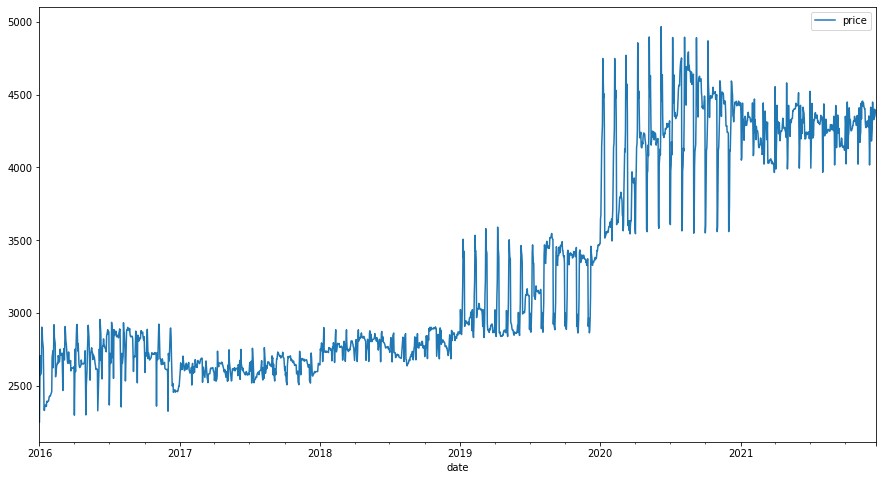

In [ ]:
df.plot(figsize=(15,8))

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:

test_result=adfuller(df['price'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(" reject the null hypothesis.")
    else:
        print(" accept null hypothesis ")


In [ ]:
adfuller_test(df['price'])

ADF Test Statistic : -0.30990365704573875
p-value : 0.9240899189086011
#Lags Used : 26
Number of Observations Used : 2155
 accept null hypothesis 


In [ ]:
df['price First Difference'] = df['price'] - df['price'].shift(1)

In [ ]:
df['Seasonal First Difference']=df['price']-df['price'].shift(30)

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.01261574022718
p-value : 1.7623278407657135e-17
#Lags Used : 7
Number of Observations Used : 2144
 reject the null hypothesis.


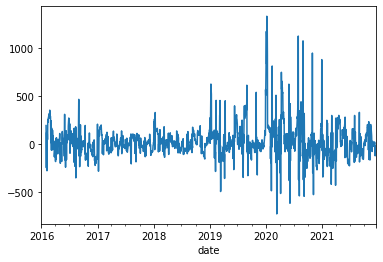

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
## Again test dickey fuller test for first differencing
adfuller_test(df['price First Difference'].dropna())

ADF Test Statistic : -21.66454212724444
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 2154
 reject the null hypothesis.


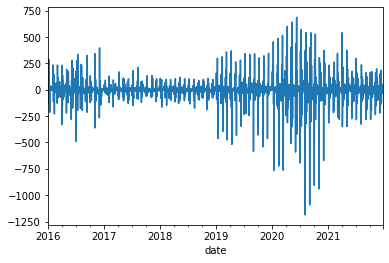

In [ ]:
df['price First Difference'].plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

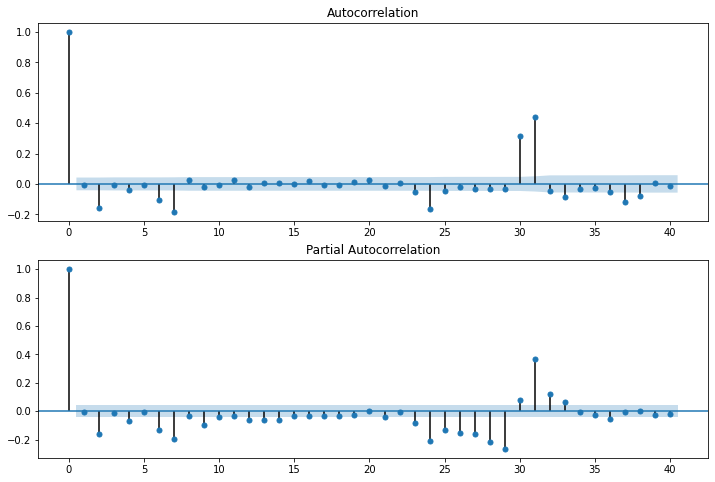

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['price First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['price First Difference'].iloc[1:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['price'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                 2181
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13326.934
Method:                       css-mle   S.D. of innovations            108.996
Date:                Mon, 05 Dec 2022   AIC                          26661.867
Time:                        08:24:26   BIC                          26684.617
Sample:                    01-02-2016   HQIC                         26670.184
                         - 12-21-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8330      0.313      2.662      0.008       0.220       1.446
ar.L1.D.price     0.7811      0.015     51.012      0.000       0.751       0.811
ma.L1.D.price    -0.9711      0.005   -209.964      0.000      -0.980      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2803           +0.0000j            1.2803            0.0000
MA.1            1.0298           +0.0000j            1.0298            0.0000
-----------------------------------------------------------------------------
"""

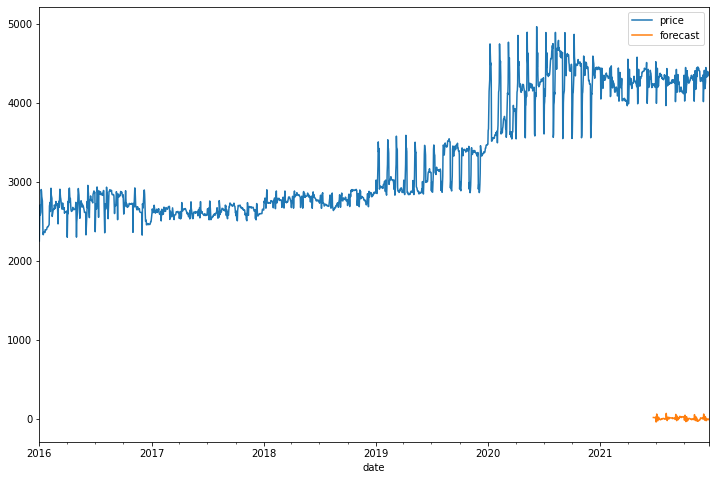

In [ ]:
df['forecast']=model_fit.predict(start=2000,end=2182)
df[['price','forecast']].plot(figsize=(12,8))


In [ ]:
model_fit.predict(start=2000,end=2182)

2021-06-23    17.411006
2021-06-24    17.165514
2021-06-25    18.085996
2021-06-26    15.256259
2021-06-27    14.351202
                ...    
2021-12-18   -11.034224
2021-12-19    -9.601678
2021-12-20    -9.141482
2021-12-21    -1.969356
2021-12-22    -0.286182
Freq: D, Length: 183, dtype: float64

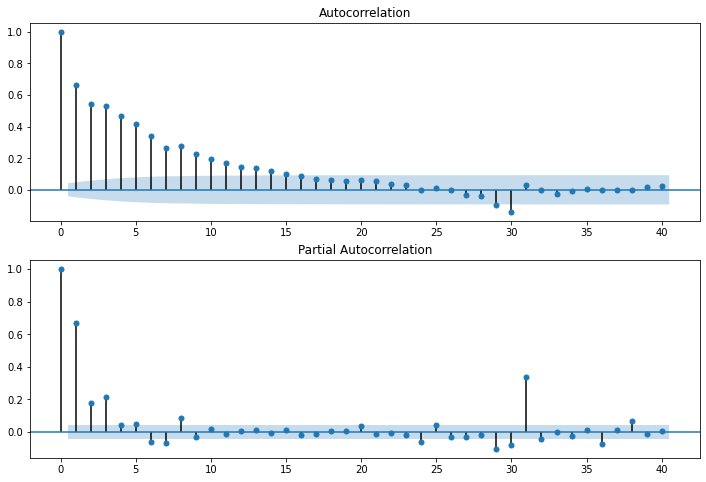

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[31:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[31:],lags=40,ax=ax2)

In [ ]:
model_s=sm.tsa.statespace.SARIMAX(df['price'],order=(3, 1, 0),seasonal_order=(3,1,0,30))
results=model_s.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


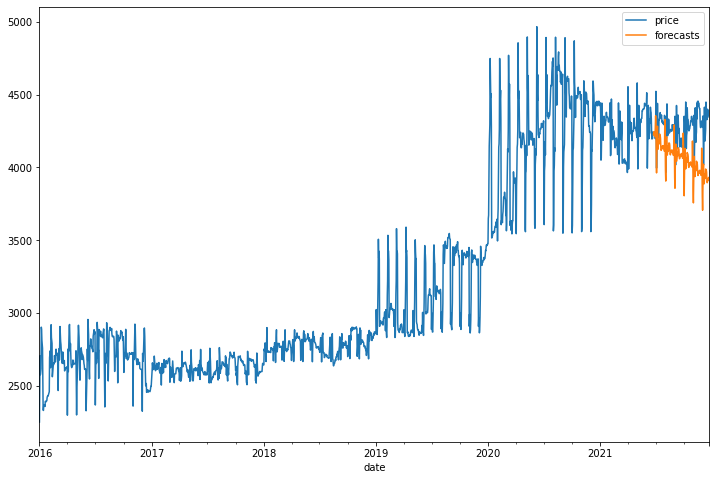

In [ ]:
df['forecasts']=results.predict(start=2000,end=2182,dynamic=True)
df[['price','forecasts']].plot(figsize=(12,8))

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                 2182
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 30)   Log Likelihood              -13205.833
Date:                            Mon, 05 Dec 2022   AIC                          26425.665
Time:                                    08:25:38   BIC                          26465.381
Sample:                                01-01-2016   HQIC                         26440.194
                                     - 12-21-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3160      0.009    -34.172      0.000      -0.334      -0.298
ar.L2         -0.3018      0.015    -20.104      0.000      -0.331      -0.272
ar.L3         -0.0937      0.014     -6.589      0.000      -0.122      -0.066
ar.S.L30      -0.3884      0.010    -38.594      0.000      -0.408      -0.369
ar.S.L60      -0.2531      0.010    -26.629      0.000      -0.272      -0.234
ar.S.L90      -0.1570      0.012    -12.746      0.000      -0.181      -0.133
sigma2      1.255e+04    143.602     87.364      0.000    1.23e+04    1.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             26730.98
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results.predict(start=1,end=2181)


2016-01-02    2248.298813
2016-01-03    2449.780612
2016-01-04    2707.177073
2016-01-05    2578.884906
2016-01-06    2598.257183
                 ...     
2021-12-17    4385.341438
2021-12-18    4364.084492
2021-12-19    4383.094444
2021-12-20    4387.684324
2021-12-21    4372.778018
Freq: D, Name: predicted_mean, Length: 2181, dtype: float64

In [ ]:
import seaborn as sns

In [ ]:
model_s1=sm.tsa.statespace.SARIMAX(df['price'],order=(0, 1, 3),seasonal_order=(0,1,3,30))
results=model_s1.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


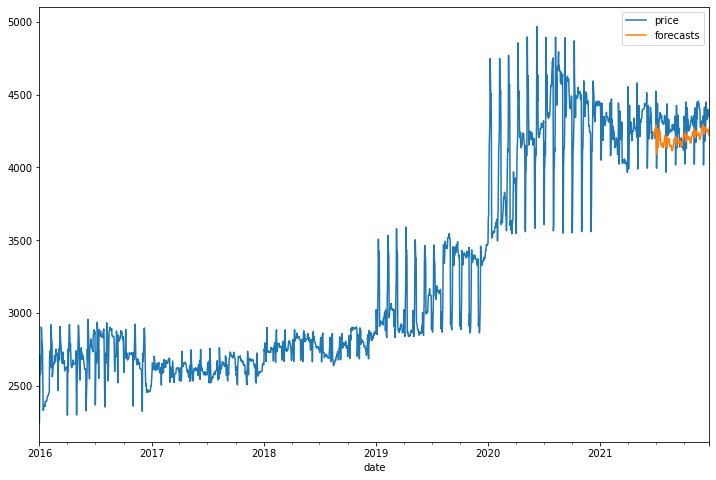

In [ ]:
df['forecasts']=results.predict(start=2000,end=2182,dynamic=True)
df[['price','forecasts']].plot(figsize=(12,8))

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                 2182
Model:             SARIMAX(0, 1, 3)x(0, 1, 3, 30)   Log Likelihood              -13102.985
Date:                            Mon, 05 Dec 2022   AIC                          26219.969
Time:                                    08:31:22   BIC                          26259.685
Sample:                                01-01-2016   HQIC                         26234.499
                                     - 12-21-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2632      0.011    -23.069      0.000      -0.286      -0.241
ma.L2         -0.1911      0.017    -11.090      0.000      -0.225      -0.157
ma.L3         -0.0226      0.017     -1.335      0.182      -0.056       0.011
ma.S.L30      -0.5806      0.535     -1.085      0.278      -1.629       0.468
ma.S.L60      -0.2382      0.225     -1.059      0.290      -0.679       0.203
ma.S.L90      -0.1808      0.100     -1.804      0.071      -0.377       0.016
sigma2      1.089e+04   5838.522      1.866      0.062    -551.193    2.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             45313.21
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               4.83   Skew:                            -1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predict=results.predict(start=1,end=2181)

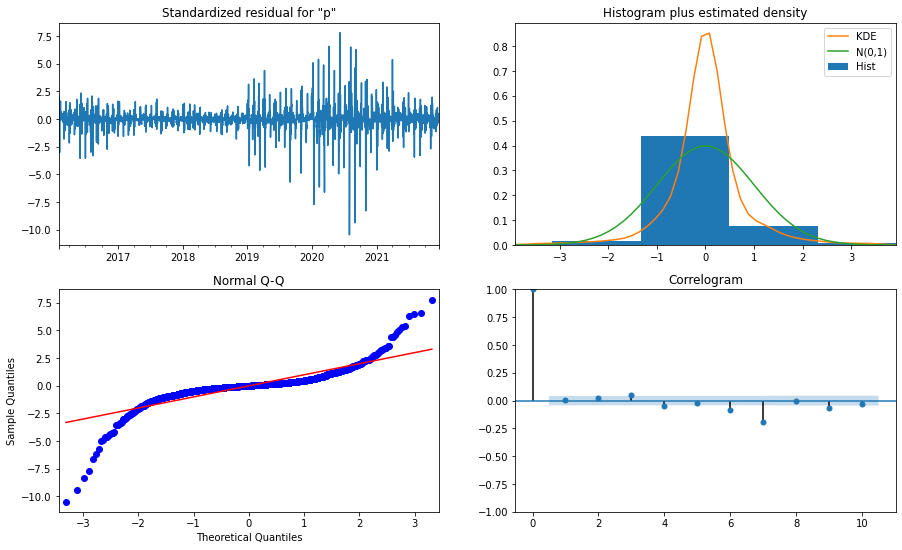

In [ ]:
results.plot_diagnostics(figsize=(15,9))
plt.show()

In [ ]:
mse = ((predict - df['price']) ** 2).mean()

In [ ]:
import math
from math import sqrt

In [ ]:
rmse=sqrt(mse)
rmse

108.9492616498892

In [ ]:
forecast_30=results.predict(start=2182,end=2213,dynamic=True)
forecast_30

2021-12-22    4312.782110
2021-12-23    4303.633915
2021-12-24    4318.093410
2021-12-25    4323.480525
2021-12-26    4345.365776
2021-12-27    4363.656431
2021-12-28    4360.675776
2021-12-29    4348.571418
2021-12-30    4327.673944
2021-12-31    4364.455494
2022-01-01    4337.093049
2022-01-02    4222.340333
2022-01-03    4274.555667
2022-01-04    4316.940442
2022-01-05    4383.845696
2022-01-06    4354.611198
2022-01-07    4296.578326
2022-01-08    4310.087785
2022-01-09    4322.108029
2022-01-10    4403.685468
2022-01-11    4342.279987
2022-01-12    4349.706831
2022-01-13    4348.957459
2022-01-14    4353.894351
2022-01-15    4381.328094
2022-01-16    4377.638005
2022-01-17    4370.873009
2022-01-18    4356.525293
2022-01-19    4336.721325
2022-01-20    4332.594934
2022-01-21    4313.648731
2022-01-22    4314.098975
Freq: D, Name: predicted_mean, dtype: float64

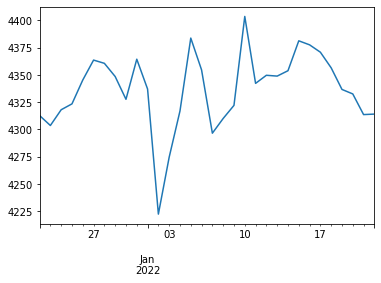

In [ ]:
forecast_30.plot()

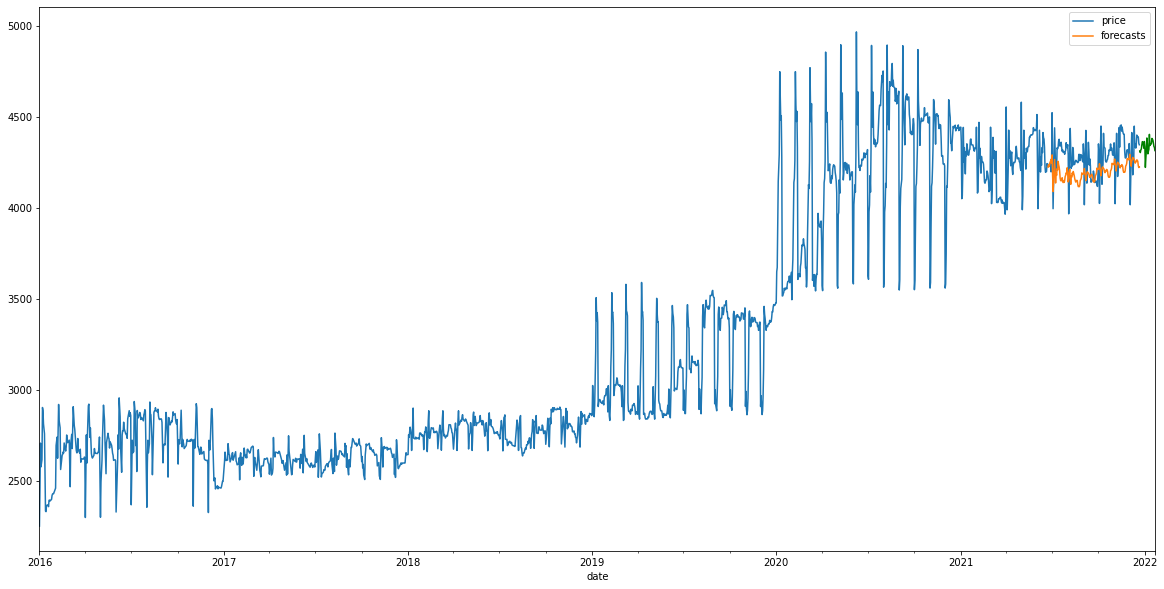

In [ ]:

df['forecasts']=results.predict(start=2000,end=2182,dynamic=True)
df[['price','forecasts']].plot(figsize=(20,10))
forecast_30.plot(color='green')
